In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

In [4]:
data.head()

,0_1,2
0,1950-01-01,-0.060310
1,1950-02-01,0.626810
2,1950-03-01,-0.008128
3,1950-04-01,0.555100
4,1950-05-01,0.071577


In [5]:
data.columns = ['month', 'value']
data.index = data.month
data = data.drop('month', 1)

In [6]:
data.head()

,value
month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577


In [7]:
data['1950':'1952'] #What do you notice about the range of dates?

,value
month,
1950-01-01,-0.060310
1950-02-01,0.626810
1950-03-01,-0.008128
1950-04-01,0.555100
1950-05-01,0.071577
1950-06-01,0.538570
1950-07-01,-0.802480
1950-08-01,-0.851010
1950-09-01,0.357970


In [10]:
# What is the empirical range of dates?
min(data.index), max(data.index)

(Timestamp('1950-01-01 00:00:00'), Timestamp('2017-10-01 00:00:00'))

In [11]:
# How to visualize?
# Using min and max

In [8]:
# What kind of index do we have?
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [12]:
data['1951-11-11':'1951-11-12']

,value
month,


In [13]:
# What if we want a period index?
data_pd = data.to_period()

In [14]:
data_pd['1951-11-11':'1951-11-12']

,value
month,
1951-11,-0.068519


In [15]:
data_pd['1951-11-11':'1952-01-12']

,value
month,
1951-11,-0.068519
1951-12,1.987200
1952-01,0.368250


In [16]:
# Which is more appropriate for this data?

A time period is more appropriate since, the values represents the average for a month

In [17]:
# How do various data loads perform?
import timeit

print("infer_datetime_format = True, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, header = None,)

print("infer_datetime_format = False, no date parser")
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, header = None,)

print("infer_datetime_format = True, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = True, date_parser = dateparse,  header = None,)

print("infer_datetime_format = False, date parser provided")
dateparse = lambda x, y: pd.datetime.strptime('%s-%s'%(x,y), '%Y-%m')
%timeit pd.read_fwf("http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii", parse_dates = [[0, 1]], infer_datetime_format = False, date_parser = dateparse,  header = None,)

infer_datetime_format = True, no date parser
1 loop, best of 3: 352 ms per loop
infer_datetime_format = False, no date parser
1 loop, best of 3: 366 ms per loop
infer_datetime_format = True, date parser provided
1 loop, best of 3: 307 ms per loop
infer_datetime_format = False, date parser provided
1 loop, best of 3: 297 ms per loop


In [18]:
# What if you already have the data frame and want to parse columns?
df = pd.DataFrame({'year': [2015, 2016],'month': [2, 3],'day': [4, 5],'hour': [2, 3]})
df

,day,hour,month,year
0,4,2,2,2015
1,5,3,3,2016


In [19]:
pd.to_datetime(df)

0   2015-02-04 02:00:00
1   2016-03-05 03:00:00
dtype: datetime64[ns]

In [20]:
pd.to_datetime(df[['year', 'month', 'day']])

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [25]:
# Does it work with other column names?

No, it does. Example below

In [24]:
df.columns=['a','b','c','d']
df.head()

,a,b,c,d
0,4,2,2,2015
1,5,3,3,2016


In [23]:
pd.to_datetime(df[['d', 'c', 'a']])

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [26]:
# Go get your own time series data, load it in, and see what you can see
# Hint: http://pandas.pydata.org/pandas-docs/stable/remote_data.html

In [34]:
import pandas_datareader as pdr
from pandas_datareader import data, wb
import pandas_datareader.data as web
import datetime

In [31]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016,12,31)

In [36]:
stock_data=web.DataReader("F", 'yahoo', start, end)

In [39]:
stock_data.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,13.87,14.00,13.75,13.97,12.366731,38618500
2016-01-05,13.97,14.00,13.51,13.72,12.145422,50267500
2016-01-06,13.56,13.56,13.05,13.11,11.605429,61285500


In [37]:
type(stock_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
# 1. plot 2. get range of dates 3. convert between time and period index

In [38]:
import matplotlib.pyplot as plt

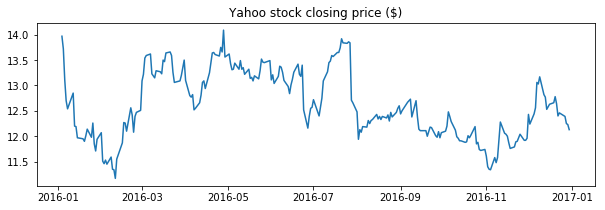

In [58]:
#plot stock price for the entire duration
plt.subplots(figsize=(10,3))
plt.plot(stock_data.index, stock_data.Close)
plt.title('Yahoo stock closing price ($)')
plt.show()

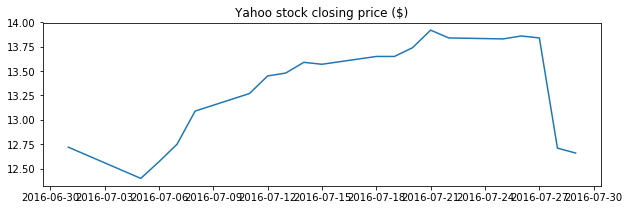

In [62]:
#plot stock price for the month of Feb 2016
plt.subplots(figsize=(10,3))
plt.plot(stock_data.loc['2016-07-01':'2016-07-31'].index, stock_data.loc['2016-07-01':'2016-07-31']['Close'])
plt.title('Yahoo stock closing price ($)')
plt.show()

In [68]:
#convert to time period index
stock_data.to_period('D')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,13.87,14.00,13.75,13.97,12.366731,38618500
2016-01-05,13.97,14.00,13.51,13.72,12.145422,50267500
2016-01-06,13.56,13.56,13.05,13.11,11.605429,61285500
2016-01-07,12.90,13.04,12.60,12.70,11.242483,57846700
2016-01-08,13.05,13.10,12.50,12.54,11.100844,46199400
2016-01-11,12.80,12.82,12.55,12.77,11.304450,41153600
2016-01-12,13.03,13.04,12.58,12.85,11.375270,50983700
2016-01-13,12.73,12.84,12.06,12.20,10.799866,102174700
2016-01-14,12.19,12.31,11.82,12.19,10.791012,62938600


In [69]:
# Let's experiment with truncate convenience function
ts = pd.Series(range(10), index = pd.date_range('7/31/2015', freq = 'M', periods = 10))
ts.truncate(before='10/31/2015', after='12/31/2015')

2015-10-31    3
2015-11-30    4
2015-12-31    5
Freq: M, dtype: int32

In [70]:
# You can truncate in a way that breaks frequency
ts[[0, 2, 6]].index

DatetimeIndex(['2015-07-31', '2015-09-30', '2016-01-31'], dtype='datetime64[ns]', freq=None)

In [71]:
# It will save you when it can
ts.ix[0:10:2].index

C:\Anac\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


DatetimeIndex(['2015-07-31', '2015-09-30', '2015-11-30', '2016-01-31',
               '2016-03-31'],
              dtype='datetime64[ns]', freq='2M')